[참고](https://wyatt37.tistory.com/9)

In [1]:
import random
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Gini Function
# a and b are the quantities of each class


def gini(a, b):
    # a의 등장확률
    a1 = (a / (a + b))**2
    # b의 등장확률
    b1 = (b / (a + b))**2

    # return gini
    return 1 - (a1 + b1)

In [14]:
gini_list = []
blue_list = []
red_list = []
blue_prob_list = []

for x in range(10000):
    blue = random.uniform(0, 4)
    red = abs(4 - blue)

    a = gini(red, blue)
    b = blue / (blue + red)

    gini_list.append(a)
    blue_list.append(blue)
    red_list.append(red)
    blue_prob_list.append(b)

df = pd.DataFrame({
    "Blue": blue_list,
    "Red": red_list,
    "Gini Score": gini_list,
    "Probability of Blue": blue_prob_list
})
df

,Blue,Red,Gini Score,Probability of Blue
0,1.810611,2.189389,0.495516,0.452653
1,0.542378,3.457622,0.234417,0.135594
2,3.016829,0.983171,0.370757,0.754207
3,1.090097,2.909903,0.396509,0.272524
4,1.100185,2.899815,0.398792,0.275046
...,...,...,...,...
9995,2.543644,1.456356,0.463056,0.635911
9996,1.968387,2.031613,0.499875,0.492097
9997,0.083239,3.916761,0.040753,0.020810
9998,3.207879,0.792121,0.317629,0.801970


Text(0.5, 1.0, 'Gini Curve')

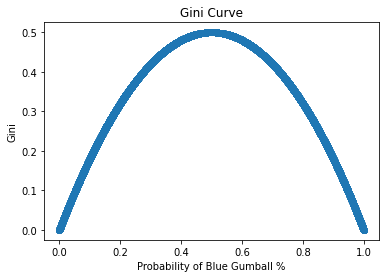

In [15]:
plt.scatter(blue_prob_list, gini_list)
plt.xlabel('Probability of Blue Gumball %')
plt.ylabel('Gini')
plt.title('Gini Curve')

In [19]:
def entropy(base, a, b):
    try:
        var = abs(((a) / (a + b)) * math.log(
            ((a) / (a + b)), base)) - (((b) / (a + b)) * math.log(
                ((b) / (a + b)), base))

        return var
    except ValueError:
        return 0

In [21]:
ent_list = []
blue_list = []
red_list = []
blue_prob_list2 = []

for x in range(10000):
    blue = random.uniform(0, 4)
    red = abs(4 - blue)
    a = entropy(2, red, blue)
    b = blue / (blue + red)
    
    ent_list.append(a)
    blue_list.append(blue)
    red_list.append(red)
    blue_prob_list2.append(b)
    
    
df = pd.DataFrame({
    "Blue": blue_list,
    "Red": red_list,
    "Entropy": ent_list,
    "Probability of Blue": blue_prob_list2
})
df

,Blue,Red,Entropy,Probability of Blue
0,0.613425,3.386575,0.618176,0.153356
1,0.237810,3.762190,0.325267,0.059452
2,2.864383,1.135617,0.860716,0.716096
3,2.862474,1.137526,0.861352,0.715618
4,2.206058,1.793942,0.992329,0.551514
...,...,...,...,...
9995,1.073538,2.926462,0.839137,0.268384
9996,1.268879,2.731121,0.901332,0.317220
9997,3.270223,0.729777,0.685395,0.817556
9998,3.938790,0.061210,0.114183,0.984697


Text(0.5, 1.0, 'Entropy Curve')

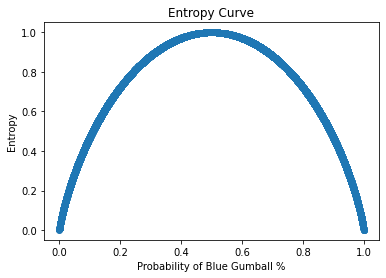

In [22]:
plt.scatter(blue_prob_list2, ent_list)
plt.xlabel('Probability of Blue Gumball %')
plt.ylabel('Entropy')
plt.title('Entropy Curve')

Text(0.5, 1.0, 'Both Curve')

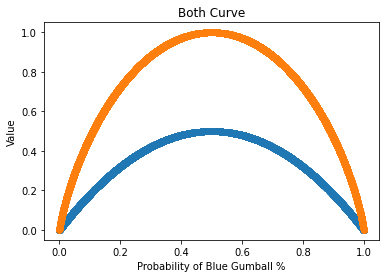

In [25]:
plt.scatter(blue_prob_list, gini_list)
plt.scatter(blue_prob_list2, ent_list)
plt.xlabel('Probability of Blue Gumball %')
plt.ylabel('Value')
plt.title('Both Curve')

Text(0.5, 1.0, 'Both Curve')

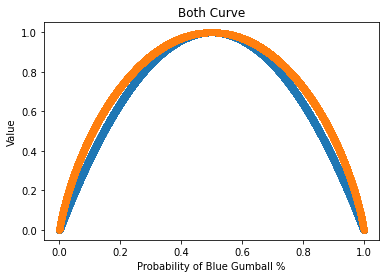

In [26]:
plt.scatter(blue_prob_list, np.array(gini_list) * 2)
plt.scatter(blue_prob_list2, ent_list)
plt.xlabel('Probability of Blue Gumball %')
plt.ylabel('Value')
plt.title('Both Curve')

## Gini vs Entropy

- 보통의 경우 지니보다 엔트로피가 성능을 냄
- 지니 인덱스 커브는 엔트로피 커브보다 경사가 더 급해서
- 즉, 극단값을 제외하고서는 엔트로피가 지니 인덱스보다 평가에 더 가혹하다.
- 반면에, 연산 속도는 지니가 엔트로피보다 빠름
- 엔트로피는 로그를 사용해서
- 더 나은 성능 => 엔트로피
- 더 빠른 계산 => 지니